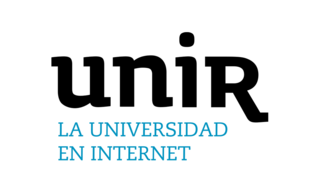

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos

In [1]:
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
covertype = fetch_ucirepo(id=31)
df = pd.DataFrame(data=covertype.data.features)
df['Cover_type'] = covertype.data.targets
df.head()
df.to_csv('covertype.csv', index=False)

In [4]:
#cargar dataset desde csv
df = pd.read_csv('covertype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


¿Cuántas instancias de datos tiene el dataset?

In [ ]:
## cuantas instancias tiene el df
print("Numero de instancias: ", df.shape[0])

Numero de instancias:  581012


Según podemos ver en el output, tenemos 581012 instancias

¿Cuántas variables continuas hay en el dataset?

En este dataset se ve claramente que las variables categóricas tienen valores de 0 o 1, mientras que las continuas tienen valores distintos. En este caso la variable cover type también es categórica ya que tiene vaores del 1 al 7.

In [ ]:
## Lista de variables categoricas
categorical = [col for col in df.columns if df[col].nunique() <= 7]

## Lista de variables en el df
variables = [col for col in df.columns]

#quitamos las variables categoricas de la lista para obtener las variables continuas

continuous = [col for col in variables if col not in categorical]
print("Variables contínuas: ", continuous)
print("Número de variables contínuas: ", len(continuous))


Variables contínuas:  ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
Número de variables contínuas:  10


Hay 10 variables continuas

¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

In [ ]:
print("Variables categóricas: ", categorical)

print("Número de variables categóricas: ", len(categorical))


Variables categóricas:  ['Wilderness_Area1', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Cover_type']
Número de variables categóricas:  45


Hay 45 variables categóricas

¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

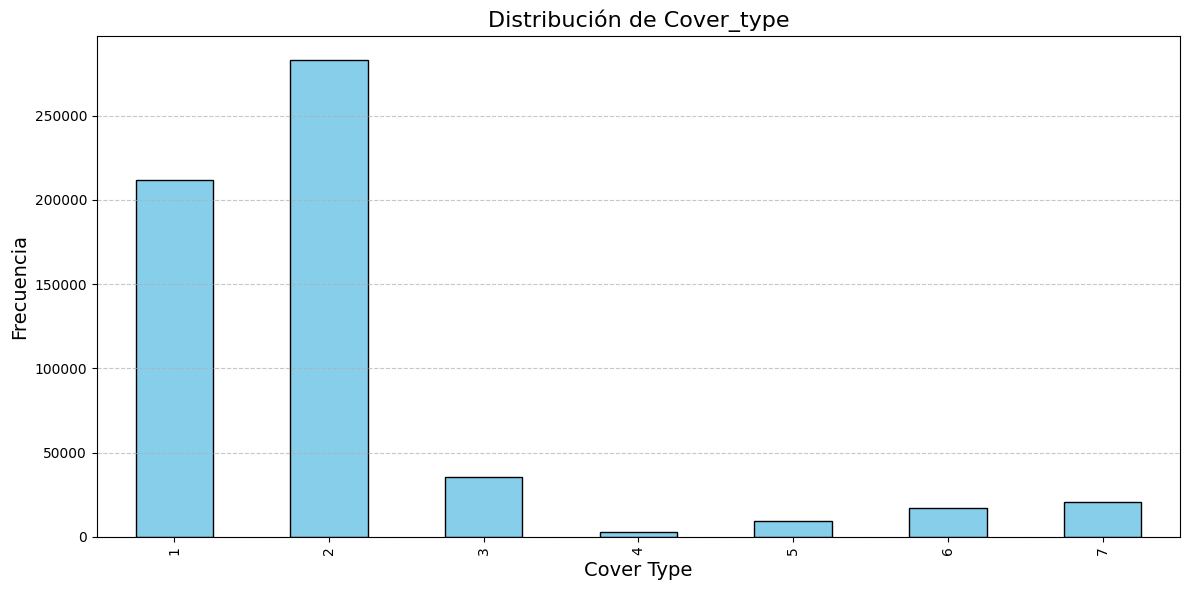

In [ ]:
# distribucion de clases del dataset
class_counts = df['Cover_type'].value_counts().sort_index()

# Graficamos la distribución
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Cover_type', fontsize=16)
plt.xlabel('Cover Type', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Como podemos ver, no es un dataset balanceado. Por lo que si al separar los datos tenemos en cuenta esto, crearemos un mejor modelo.

¿Existen valores nulos o perdidos en el dataset?

In [ ]:
## PON AQUÍ TU CÓDIGO
null_values = df.isnull().sum()
print("Valores nulos por columna:")
print(null_values)

Valores nulos por columna:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14  

No existen valores nulos

¿Existe alguna variable altamente correlacionada con la variable de clase?

_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamosfiltar aquellas correlaciones superiores al 0.80 con la variable de clase.

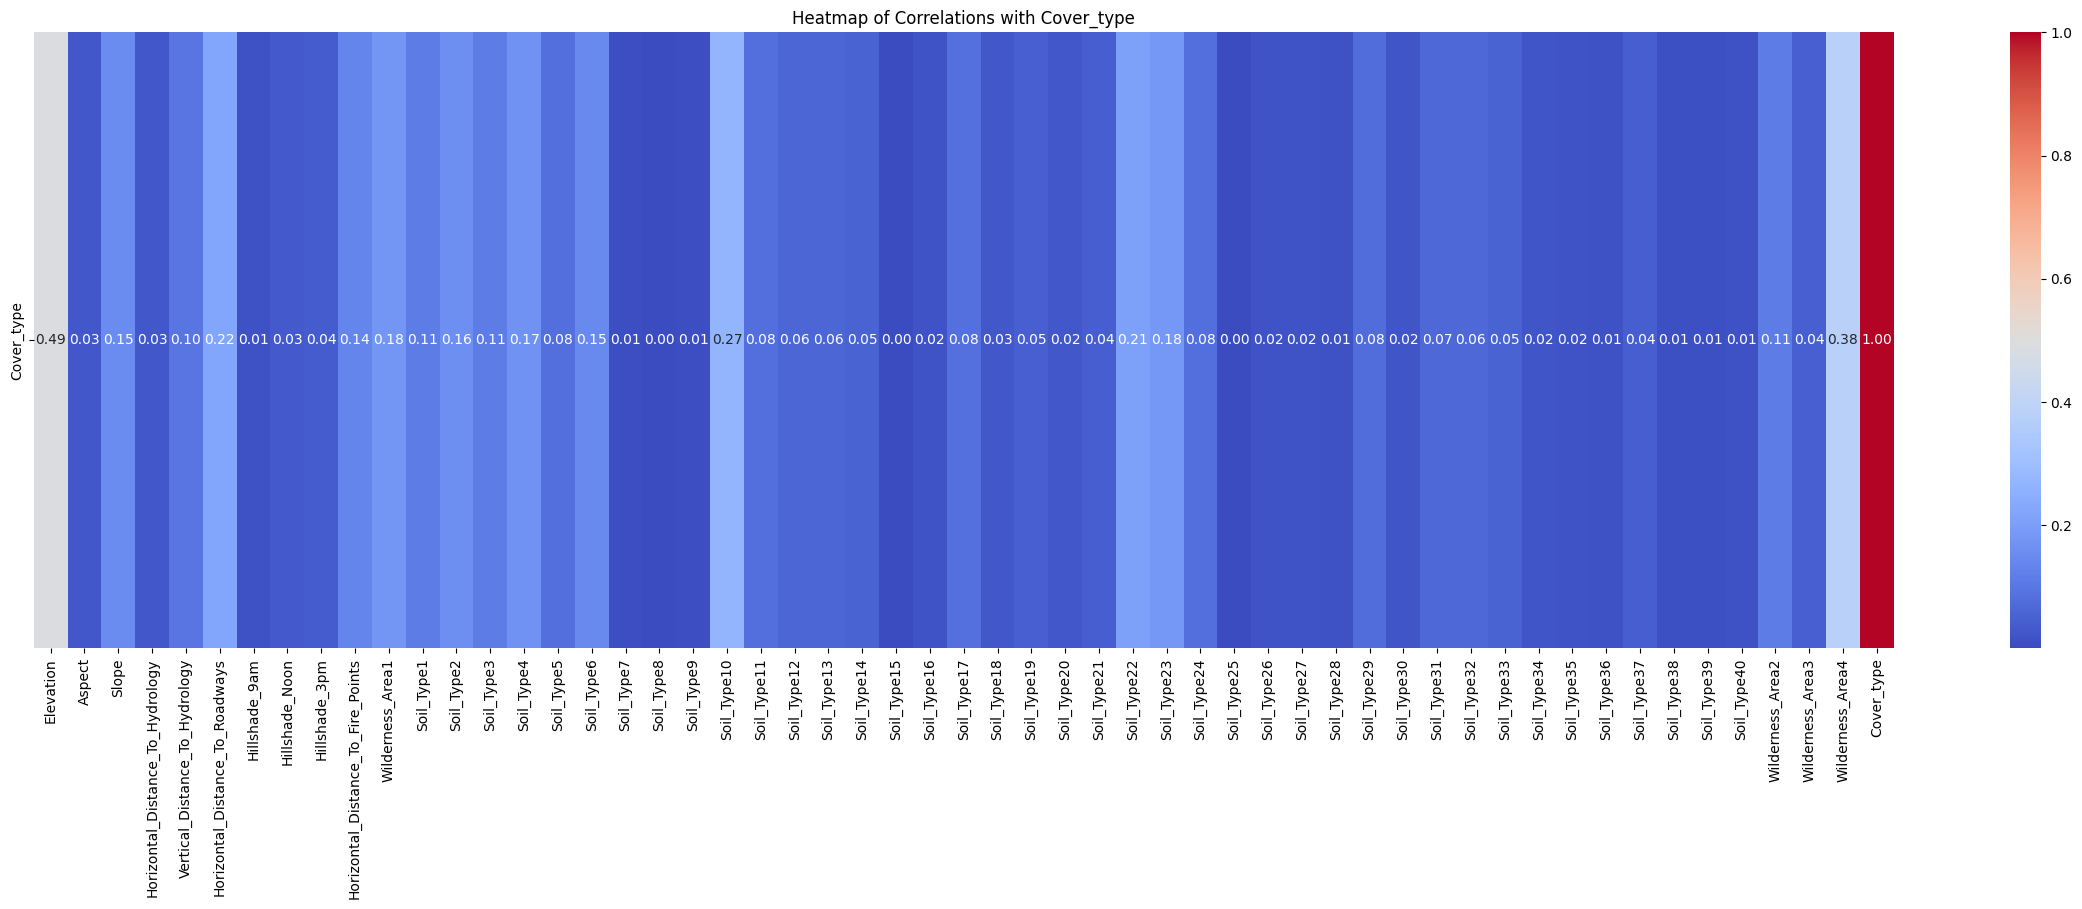

In [ ]:
correlation_matrix = df.corr(method='spearman').abs()  # Use 'spearman' for non-normal data

# Select the target variable (Cover_type)
target_correlation = correlation_matrix['Cover_type']
# Reshape target_correlation to a 2D array
target_correlation_matrix = target_correlation.to_frame().T

# Create the heatmap
plt.figure(figsize=(30, 8))
sns.heatmap(target_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations with Cover_type')
plt.show()

Como podemos ver no hay correlaciones mayores a 49% con la variable a predecir. Pero esto no nos sirve, ya que la correlación de Pearson se calcula cuando la variable objetivo es continua. En este caso no es, por lo que para ver la relación entre nuestra variable objetivo y las otras variables usaremos otros algoritmos.

¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

Para esto vamos a utilizar Chi cuadrado, ya que nuestra vaiable objetiva es categóirica y haremos chi2 con las 44 otras variables categóricas.

In [ ]:
# Filtrar solo las variables categóricas
df_categorical = df.drop(columns=continuous)

# Lista para almacenar resultados
chi2_results = []

# Aplicar Chi-cuadrado a cada variable categórica con la variable objetivo
for col in df_categorical.columns:
    if col != 'Cover_type':
        contingency_table = pd.crosstab(df_categorical[col], df_categorical['Cover_type'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results.append({'Variable': col, 'Chi2': chi2, 'p-value': p})

# Convertir a DataFrame y mostrar resultados
chi2_results_df = pd.DataFrame(chi2_results)
print(chi2_results_df.sort_values(by='p-value'))

            Variable           Chi2        p-value
0   Wilderness_Area1   56245.464609   0.000000e+00
22       Soil_Type22   26185.339083   0.000000e+00
23       Soil_Type23   20386.020392   0.000000e+00
24       Soil_Type24    4109.678859   0.000000e+00
26       Soil_Type26    1659.039574   0.000000e+00
29       Soil_Type29   22594.873831   0.000000e+00
30       Soil_Type30   12662.866708   0.000000e+00
31       Soil_Type31    3768.128852   0.000000e+00
32       Soil_Type32    6674.090932   0.000000e+00
33       Soil_Type33    5176.902117   0.000000e+00
35       Soil_Type35   12871.276707   0.000000e+00
37       Soil_Type37    8147.991669   0.000000e+00
38       Soil_Type38   67503.903907   0.000000e+00
39       Soil_Type39   63634.950899   0.000000e+00
40       Soil_Type40   40964.997599   0.000000e+00
41  Wilderness_Area2   13096.414181   0.000000e+00
42  Wilderness_Area3    7292.697041   0.000000e+00
18       Soil_Type18    2018.496712   0.000000e+00
43  Wilderness_Area4  314948.43

Según Chi2, las 3 variables categricas que más van a influir en la variable objetivo son:
- Wilderness_Area4: 314948.432574.
- Soil_Type10: 129161.457207.
- Soil_Type4: 67826.146590.


Para ver que variables contínuas que tengan relación con la objetivo, vamos a usar ANOVA. ANOVA te ayuda a ver si hay diferencias significativas en las variables continuas según la categoría de la variable objetivo.

In [ ]:
df_continuous = df.drop(columns=categorical)


anova_results = []

# Aplicar ANOVA a cada variable continua con la variable objetivo
for col in df_continuous.columns:
    if col != 'Cover_type':
        groups = [df_continuous[col][df['Cover_type'] == cat] for cat in df['Cover_type'].unique()]
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results.append({'Variable': col, 'F-stat': f_stat, 'p-value': p_value})

# Convertir a DataFrame y mostrar resultados
anova_results_df = pd.DataFrame(anova_results)
print(anova_results_df.sort_values(by='p-value'))

                             Variable         F-stat  p-value
0                           Elevation  155306.869021      0.0
1                              Aspect     446.717061      0.0
2                               Slope    7762.474223      0.0
3    Horizontal_Distance_To_Hydrology    2364.952074      0.0
4      Vertical_Distance_To_Hydrology    1205.333661      0.0
5     Horizontal_Distance_To_Roadways   10275.781727      0.0
6                       Hillshade_9am    3231.992007      0.0
7                      Hillshade_Noon    2920.383824      0.0
8                       Hillshade_3pm    1042.196255      0.0
9  Horizontal_Distance_To_Fire_Points    7262.064444      0.0


En esta prueba nos sale que las variables más influyentes van a ser: 
- Elevation: 155306.869021.
- Horizontal_Distance_To_Roadways: 10275.781727
- Slope: 7762.474223.

In [ ]:
X, y = df.drop('Cover_type',axis=1),df['Cover_type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

- n_estimators: Número de árboles en el "bosque".
- criterion: La función que mide la calidad de una división de los bosques. Por defecto: gini. 
- max_depth: La profundidad máxima de los árboles.
- min_samples_split: El número mínimo de muestras para dividir un nodo interno.
- min_samples_leaf: El número mínimo de muestras requeridas en una hoja.
- max_features: El número máximo de características consideradas en cada división.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Este hiperparámetro se utiliza cuando tu dataset está desbalanceado en problemas de clasificación. Su propósito es ajustar el peso asignado a cada clase durante el entrenamiento, para que el modelo tenga más en cuenta las clases menos representadas.

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

Para el preprocesamiento de los datos he indagado sobre varias técnicas que me parecían útiles:

- Normalización: No hace falta, ya que los érboles de decisión son insensibles a la escala de las variables. Ya que esta técnica no usa métricas de distancia como la euclídea u otras como sí lo usan KNN o SVM entre otros.

- Transformar a formato one hot encoding: Es útil transformar las variables categóricas de del conjunto X a One hot encoding, pero en este momento las variables categóricas ya están en formato one-hot.

- Valores atípicos: Random Forest es menos sensible a los outliers que otros modelos debido a que los árboles se basan en divisiones por umbrales, no promedios ni distancias.

- Balanceo de clases: Como este Dataset tiene los datos desbalanceados probaremos esto para que el modelo tenga más en cuenta las variables menos representadas.

Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [ ]:
n_arboles = [5, 10, 20, 50, 100]
particion = "gini"
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_features = None # None significa usar todas las características

randomForest = []
for i in n_arboles:
    rf = RandomForestClassifier(n_estimators=i, criterion=particion,
                                max_depth=max_depth, min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf, max_features=max_features,
                                random_state=42, n_jobs=-1) # Añadido random_state y n_jobs
    rf.fit(X_train, y_train) # Entrena el modelo
    randomForest.append(rf)

In [ ]:
for i in range(0,5):
    y_pred = randomForest[i].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión del modelo {i} con {n_arboles[i]} árboles: {accuracy}")

Precisión del modelo 0 con 5 árboles: 0.795590475288934
Precisión del modelo 1 con 10 árboles: 0.796080996187706
Precisión del modelo 2 con 20 árboles: 0.792561293598272
Precisión del modelo 3 con 50 árboles: 0.7936456029534521
Precisión del modelo 4 con 100 árboles: 0.7954613908418887


Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

In [ ]:
y_pred = randomForest[2].predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[32122  9807     3     0    18    17   308]
 [ 7251 48780   273     0    57   229    12]
 [    0   788  6179    50     0   252     0]
 [    0     0   174   365     0     7     0]
 [    2  1439    25     0   460     3     0]
 [    1   856  1373    22     0  1244     0]
 [ 1109    29     0     0     0     0  2948]]


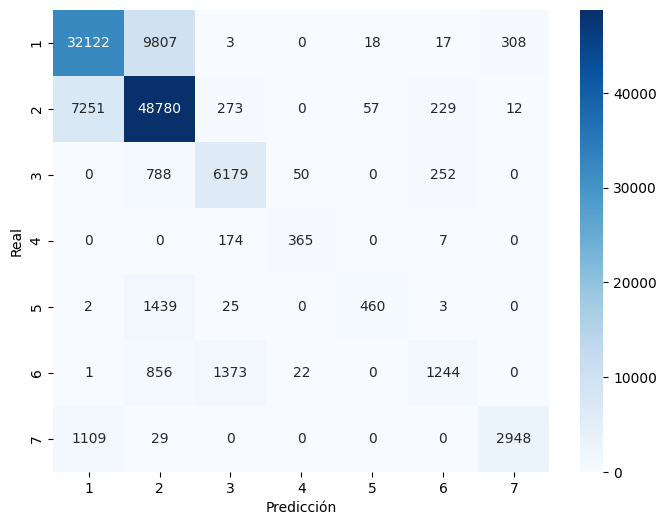

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=randomForest[2].classes_, yticklabels=randomForest[2].classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.79      0.76      0.78     42275
           2       0.79      0.86      0.82     56602
           3       0.77      0.85      0.81      7269
           4       0.84      0.67      0.74       546
           5       0.86      0.24      0.37      1929
           6       0.71      0.36      0.47      3496
           7       0.90      0.72      0.80      4086

    accuracy                           0.79    116203
   macro avg       0.81      0.64      0.69    116203
weighted avg       0.79      0.79      0.79    116203



¿Cuántos ejemplos ha clasificado correctamente?

In [ ]:
clase = 0
for i in cm:
    sum = 0
    for j in i:
        sum += j
    print(f"Nº of correct predictions in class {clase+1}: {i[clase]}. %: {i[clase]/sum * 100:.2f}%")   
    
    clase += 1

Nº of correct predictions in class 1: 32122. %: 75.98%
Nº of correct predictions in class 2: 48780. %: 86.18%
Nº of correct predictions in class 3: 6179. %: 85.00%
Nº of correct predictions in class 4: 365. %: 66.85%
Nº of correct predictions in class 5: 460. %: 23.85%
Nº of correct predictions in class 6: 1244. %: 35.58%
Nº of correct predictions in class 7: 2948. %: 72.15%


Ha plasificado correctamente este número de instancias en cada una de estas clases:

Nº de ejemplos correctamente clasificados en la clase 1: 32122.

Nº de ejemplos correctamente clasificados en la clase 2: 48780. 

Nº de ejemplos correctamente clasificados en la clase 3: 6179. 

Nº de ejemplos correctamente clasificados en la clase 4: 365.  

Nº de ejemplos correctamente clasificados en la clase 5: 460. 

Nº de ejemplos correctamente clasificados en la clase 6: 1244.  

Nº de ejemplos correctamente clasificados en la clase 7: 2948.

Ahora vamos a probar class weight balanced para ver si balanceando da mejores resultados.

In [ ]:
randomForestb = []
for i in n_arboles:
    rfb = RandomForestClassifier(n_estimators=i, criterion=particion,
                                max_depth=max_depth, min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf, max_features=max_features,
                                random_state=42, n_jobs=-1, class_weight='balanced') # Añadido random_state y n_jobs
    rfb.fit(X_train, y_train) # Entrena el modelo
    randomForestb.append(rfb)

In [ ]:
for i in range(0,5):
    y_predb = randomForestb[i].predict(X_test)
    accuracyb = accuracy_score(y_test, y_predb)
    print(f"Precisión del modelo {i} con {n_arboles[i]} árboles: {accuracyb}")

Precisión del modelo 0 con 5 árboles: 0.6722890114713045
Precisión del modelo 1 con 10 árboles: 0.6847327521664673
Precisión del modelo 2 con 20 árboles: 0.6817982324036385
Precisión del modelo 3 con 50 árboles: 0.6825211053070919
Precisión del modelo 4 con 100 árboles: 0.6829083586482276


In [ ]:
y_predb = randomForestb[2].predict(X_test)

cmb = confusion_matrix(y_test, y_predb)

print(cmb)

[[30360  6958    19     0  1544   191  3203]
 [ 9808 34275   938    12  8714  2324   531]
 [    0    70  5519   224   239  1217     0]
 [    0     0    18   518     0    10     0]
 [    0    71    25     0  1773    60     0]
 [    0     9   362    52   134  2939     0]
 [  218     9     0     0    16     0  3843]]


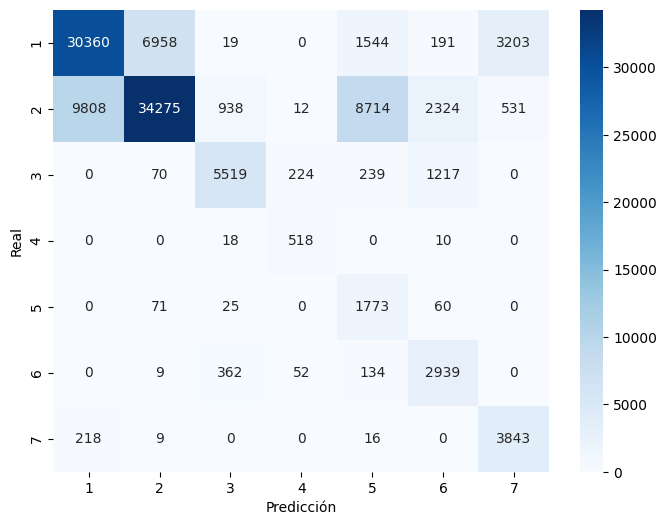

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cmb, annot=True, fmt='d', cmap='Blues', xticklabels=randomForestb[2].classes_, yticklabels=randomForestb[2].classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [ ]:
print(classification_report(y_test, y_predb))


              precision    recall  f1-score   support

           1       0.75      0.72      0.73     42275
           2       0.83      0.61      0.70     56602
           3       0.80      0.76      0.78      7269
           4       0.64      0.95      0.77       546
           5       0.14      0.92      0.25      1929
           6       0.44      0.84      0.57      3496
           7       0.51      0.94      0.66      4086

    accuracy                           0.68    116203
   macro avg       0.59      0.82      0.64    116203
weighted avg       0.76      0.68      0.70    116203



In [ ]:
clase = 0
for i in cmb:
    sum = 0
    for j in i:
        sum += j
    print(f"Nº of correct predictions in class {clase+1}: {i[clase]}. %: {i[clase]/sum * 100:.2f}%")   
    
    clase += 1

Nº of correct predictions in class 1: 30360. %: 71.82%
Nº of correct predictions in class 2: 34275. %: 60.55%
Nº of correct predictions in class 3: 5519. %: 75.93%
Nº of correct predictions in class 4: 518. %: 94.87%
Nº of correct predictions in class 5: 1773. %: 91.91%
Nº of correct predictions in class 6: 2939. %: 84.07%
Nº of correct predictions in class 7: 3843. %: 94.05%


Ha plasificado correctamente este número de instancias en cada una de estas clases:

Nº de ejemplos correctamente clasificados en la clase 1: 30360.

Nº de ejemplos correctamente clasificados en la clase 2: 34275. 

Nº de ejemplos correctamente clasificados en la clase 3: 5519. 

Nº de ejemplos correctamente clasificados en la clase 4: 518.  

Nº de ejemplos correctamente clasificados en la clase 5: 1773. 

Nº de ejemplos correctamente clasificados en la clase 6: 2939.  

Nº de ejemplos correctamente clasificados en la clase 7: 3843.

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

Sin balancear:

Cuando no usamos 'class_weight' el modelo clasifica mejor las clases más numerosas, como por ejemplo cover type 1, 2 o 3. Cuando vemos las clases menos representadas como la 5 o 6 podemos fijarnos en que las predicciones de la misma clase son menores que en otras clases, por lo que en estas clases no hace buenas predicciones. Se puede ver que en las clases 4 y 7, aunque las predicciones son correctas, hay un pocentaje muy notable de las predicciones que se hacen a una única clase distinta de la objetivo.

Esta diferencia de predicciones se da al tener un dataset muy desalanceado, lo que hace que el modelo opte por predecir en muchos casos las clases 1 y 3 por encima de lo normal.

Esto no es algo faborable a nuestro modelo, ya que un modelo bueno se ve cuando la clasificación se hace bien sin importar la clase. Por esto, estos modelos no los considero tan buenos ya uqe aunque tienen un 79% de acc, no clasifica las clases minoritarias de forma correcta. Para ello hemos usado class_weight para balancear los datos y ver las diferencias.

Balanceados:

En este apartado hemos usado 'class_weight', el propósito de este hiperparámetro es ajustar el peso asignado a cada clase durante el entrenamiento, para que el modelo tenga más en cuenta las clases menos representadas. Como podemos ver, las clases más minoritarias se clasifican mucho mejor, mientras que las clases con más instancias tienen un porcentaje más bajo de acierto. El porcentaje de acierto global del modelo es peor en general, esto se da porque son justo las clases más mayoritarias como la 2 que tienen un porcentaje mucho menor de aciertos.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

De los modelos entrenados, el mejor, es el modelo con 10 árboles y balanceado. Pero vamos a probar a hacer un gridsearch para ver exactamente cual es el mejor modelo que podemos entrenar.

Voy a usar los hiper parámetros que mejor resultdo me ha dado así puedo asegurar que pueda reproducirlo sin tener que esperar 12 horas a que entrene.

In [ ]:
param_grid = {
  'n_estimators': [10, 12, 14],
  'max_depth': [10, 12],
  'min_samples_split': [9, 10, 11],
  'min_samples_leaf': [2, 4],
  'max_features': ['sqrt', None],
  'criterion': ['entropy'],
  'bootstrap': [True, False],
  'class_weight': ['balanced']
}

rf = RandomForestClassifier()
# Create the GridSearchCV object using the estimator parameter
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Adjust the GridSearch
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 10}
Precisión en el conjunto de prueba: 0.7563488033871759


Hice esto varias veces debido a que apagaba el ordenador y el mejor resultado me dio con los siguientes parámetros.

In [ ]:
rff = RandomForestClassifier(n_estimators=14, criterion='entropy',
                                max_depth=12, min_samples_split=11,
                                min_samples_leaf=2, max_features=None,
                                random_state=42, n_jobs=-1, class_weight='balanced') # Añadido random_state y n_jobs
rff.fit(X_train, y_train) 

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features=None, min_samples_leaf=2,
                       min_samples_split=11, n_estimators=14, n_jobs=-1,
                       random_state=42)

In [ ]:
accuracy = rff.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.7604709000628211


Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

Tras entrenar este último modelo podemos ver como los resultados generales son claramente mejores a los que hemos conseguido cuando hemos usado los hiperparámetros propuestos.

Vamos a ver los resultados de cada clase para verificar que los resultados son mejores.

In [ ]:
y_predb = rff.predict(X_test)

cm = confusion_matrix(y_test, y_predb)

print(cm)

[[33052  5605    36     0   989    77  2516]
 [ 8589 39689  1005     3  5260  1677   379]
 [    0     9  6114   147    58   941     0]
 [    0     0    20   517     0     9     0]
 [    2    41    18     0  1850    18     0]
 [    0     6   214    37    21  3218     0]
 [  150     5     0     0     2     0  3929]]


In [ ]:
clase = 0
for i in cm:
    sum = 0
    for j in i:
        sum += j
    print(f"Nº of correct predictions in class {clase+1}: {i[clase]}. %: {i[clase]/sum * 100:.2f}%")   
    
    clase += 1

Nº of correct predictions in class 1: 33052. %: 78.18%
Nº of correct predictions in class 2: 39689. %: 70.12%
Nº of correct predictions in class 3: 6114. %: 84.11%
Nº of correct predictions in class 4: 517. %: 94.69%
Nº of correct predictions in class 5: 1850. %: 95.90%
Nº of correct predictions in class 6: 3218. %: 92.05%
Nº of correct predictions in class 7: 3929. %: 96.16%


Este modelo es mejor que el modelo entrenado sin balancear las clases por lo ya explicado anteriormente.

Además mejora el resultado de la clasificación en cada una de las clases. Se ve como la clasificación de las últimas 4 clases es casi perfecto, mientras que el de las 3 primeras es muy bueno. Por tanto es el mejor modelo que hemos entrenado. 

Para terminar de verificar que es un buen modelo, vamos a comprobar el sobreajuste

In [ ]:
y_pred_train = rff.predict(X_train)

cms = confusion_matrix(y_train, y_pred_train)

print(cms)

[[133125  21929    139      0   3791    375  10206]
 [ 33758 160325   3892     15  20589   6688   1432]
 [     0     17  24433    529    211   3295      0]
 [     0      0     14   2176      0     11      0]
 [     1     42     31      0   7448     42      0]
 [     0      6    563    109     71  13122      0]
 [   370      3      0      0      1      0  16050]]


In [ ]:
clase = 0
for i in cms:
    sum = 0
    for j in i:
        sum += j
    print(f"Nº of correct predictions in class {clase+1}: {i[clase]}. %: {i[clase]/sum * 100:.2f}%")   
    
    clase += 1

Nº of correct predictions in class 1: 133125. %: 78.51%
Nº of correct predictions in class 2: 160325. %: 70.72%
Nº of correct predictions in class 3: 24433. %: 85.77%
Nº of correct predictions in class 4: 2176. %: 98.86%
Nº of correct predictions in class 5: 7448. %: 98.47%
Nº of correct predictions in class 6: 13122. %: 94.60%
Nº of correct predictions in class 7: 16050. %: 97.72%


Como podemos ver, este modelo no tiene apenas sobreajuste ya que funciona de forma muy parecida en datos vistos (train) como en datos nunca vistos (test)

Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


In [ ]:
#nº instancias test
print("Nº instancias test: ", len(y_test))

Nº instancias test:  116203


In [ ]:
print(cm)
clase = 0
total = 0
for i in cm:
    sum = 0
    for j in i:
        sum += j 
    total += i[clase]
    
    clase += 1

print(f"Total de predicciones correctas: {total}.")

[[33052  5605    36     0   989    77  2516]
 [ 8589 39689  1005     3  5260  1677   379]
 [    0     9  6114   147    58   941     0]
 [    0     0    20   517     0     9     0]
 [    2    41    18     0  1850    18     0]
 [    0     6   214    37    21  3218     0]
 [  150     5     0     0     2     0  3929]]
Total de predicciones correctas: 88369.


In [ ]:
print(f"Total de predicciones erroneas: {len(y_test) - total}.")

Total de predicciones erroneas: 27834.


Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
print(classification_report(y_test, y_predb))

              precision    recall  f1-score   support

           1       0.79      0.78      0.79     42275
           2       0.88      0.70      0.78     56602
           3       0.83      0.84      0.83      7269
           4       0.73      0.95      0.83       546
           5       0.23      0.96      0.37      1929
           6       0.54      0.92      0.68      3496
           7       0.58      0.96      0.72      4086

    accuracy                           0.76    116203
   macro avg       0.65      0.87      0.71    116203
weighted avg       0.81      0.76      0.77    116203



Podemos interpretar los resultados de esta manera:

Las clases con más datos (1, 2, 3) tienen F1-Scores más altos, lo que sugiere que el modelo funciona mejor con ellas.

Las clases con pocos datos (4, 5, 6, 7) tienen valores más variados, lo que indica un desempeño menos estable.

La clase 5 tiene una precisión muy baja (0.23) pero un recall alto (0.96), lo que sugiere que el modelo clasifica muchos ejemplos como clase 5 (incluso cuando no lo son), generando muchos falsos positivos.

La precisión macro promedio (0.65) es menor que la ponderada (0.81), lo que sugiere que el modelo favorece clases más frecuentes.



Este modelo claremente clasifica mehir las 4 últimas variables (las menos representadas en el dataset), mientras que tiene algún problema para clasificar las dos primeras variables, las cuales son las clases más representadas.

Para terminar, quería ver si la predicción de las variables más importantes era correcta.

In [ ]:
feature_names =  df.drop(columns=["Cover_type"]).columns # Asegúrate de que df es el DataFrame original con las features

# Obtener las importancias
importances = rff.feature_importances_

# Crear un DataFrame ordenado
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)  # Ordenar de mayor a menor

# Mostrar de forma legible
print(importance_df.head(10))  # Muestra las 10 características más importantes


                               Feature  Importance
0                            Elevation    0.641187
5      Horizontal_Distance_To_Roadways    0.065316
9   Horizontal_Distance_To_Fire_Points    0.056227
3     Horizontal_Distance_To_Hydrology    0.040487
6                        Hillshade_9am    0.030873
10                    Wilderness_Area1    0.027704
4       Vertical_Distance_To_Hydrology    0.017039
7                       Hillshade_Noon    0.015256
20                         Soil_Type10    0.014361
1                               Aspect    0.012127


**Support Vector Machine**

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

- C: Regularización. El parámetro C controla el compromiso entre maximizar el margen y minimizar el error. Es un parámetro de regularización que ayuda a balancear el ajuste del modelo. Un C pequeño significa que estamos dispuestos a permitir algunos errores en la clasificación para obtener un margen más amplio, lo que favorece un modelo más generalizado. Un C grande hace que el modelo sea más estricto en cuanto a la clasificación correcta de los puntos de datos, y, por lo tanto, puede ser más sensible al ruido, lo que puede llevar a sobreajuste.

- Kernel: El parámetro kernel define la función de transformación que se utiliza para convertir los datos a un espacio de mayor dimensión donde un hiperplano lineal pueda separarlos. Dependiendo del tipo de datos y el problema, diferentes kernels pueden ser más efectivos.

- Degree: El parámetro degree controla el grado del polinomio utilizado en el kernel 'poly'. Es decir, determina la complejidad de la transformación polinómica aplicada a los datos. Un degree bajo (ej. 2) genera una transformación más simple y un modelo más lineal. Un degree alto (ej. 5 o más) genera una transformación más compleja, lo que puede llevar a un modelo más flexible pero también a sobreajuste si el grado es demasiado alto.

- Gamma: El parámetro gamma controla la influencia de los puntos de datos sobre el margen de decisión. En el caso del kernel 'rbf', gamma define la forma de la función de similitud que se utiliza para calcular las distancias entre los puntos. Un gamma bajo (ej. 0.01) significa que la influencia de cada punto en el margen es más amplia, lo que lleva a un modelo más generalizado. Un gamma alto (ej. 100) significa que la influencia de cada punto es más limitada, y el modelo se vuelve más flexible, pero puede sobreajustarse fácilmente.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

El parámetro decision_function_shape controla cómo se calcula la función de decisión para los problemas multiclase. En SVM, la clasificación se basa en encontrar un hiperplano de separación que divida las clases. En un problema de clasificación binaria, esto es directo, pero en un problema multiclase, se deben realizar múltiples comparaciones para decidir a qué clase pertenece un punto de datos.

Tiene dos posibles:

- OVO (One-Versus-One): Enfoque de clasificación donde se entrena un clasificador SVM para cada par de clases. Es útil cuando tienes un número limitado de clases.

- OVR (One-Versus-Rest): Enfoque donde se entrena un clasificador SVM para cada clase frente al resto. Es más eficiente para problemas con muchas clases.

¿Para qué puede ser útil?

'ovo' es útil cuando se tiene un número pequeño de clases y se desea un enfoque más detallado.
'ovr' es preferible cuando se tiene un número grande de clases, ya que es más eficiente en términos de recursos computacionales.








Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [ ]:
# Suponiendo que tu dataframe se llama df y la columna de la clase es "target"
df_subset, _ = train_test_split(df, train_size=100000, stratify=df["Cover_type"], random_state=42)

# Verificar distribución de clases antes y después
print("Distribución original:")
print(df["Cover_type"].value_counts(normalize=True))

print("\nDistribución en el subconjunto:")
print(df_subset["Cover_type"].value_counts(normalize=True))


Distribución original:
Cover_type
2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: proportion, dtype: float64

Distribución en el subconjunto:
Cover_type
2    0.48760
1    0.36460
3    0.06154
7    0.03530
6    0.02989
5    0.01634
4    0.00473
Name: proportion, dtype: float64


Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

In [ ]:
X = df_subset.drop(columns=["Cover_type"]) 
y = df_subset["Cover_type"]

Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

En SVM si es necesario normalizar. Para ello vamos a usar minmax scaler

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [ ]:
C_values = [0.1, 1, 10, 100, 1000]

models = []

results = {}

for C_value in C_values:
    svm = SVC(C=C_value, kernel='rbf', gamma='scale', class_weight='balanced',random_state=42)
    svm.fit(X_train, y_train)
    
    # Predecir sobre el conjunto de prueba
    y_pred = svm.predict(X_test)
    
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    
    # Almacenar los resultados
    results[C_value] = {
        "Model": svm,
        "Accuracy": accuracy
    }
    
    # Mostrar el resultado para cada modelo
    print(f"Modelo SVM con C={C_value} tiene una precisión de: {accuracy:.4f}")

    models.append(svm)

# Ver los resultados en un formato más estructurado
results_df = pd.DataFrame({
    "C": C_values,
    "Accuracy": [result["Accuracy"] for result in results.values()]
})

print("\nResultados de precisión para cada valor de C:")
print(results_df)

Modelo SVM con C=0.1 tiene una precisión de: 0.4693
Modelo SVM con C=1 tiene una precisión de: 0.5186
Modelo SVM con C=10 tiene una precisión de: 0.5521
Modelo SVM con C=100 tiene una precisión de: 0.5786
Modelo SVM con C=1000 tiene una precisión de: 0.6130

Resultados de precisión para cada valor de C:
        C  Accuracy
0     0.1   0.46930
1     1.0   0.51860
2    10.0   0.55210
3   100.0   0.57860
4  1000.0   0.61305


Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

In [ ]:
cm_list = []

for i in range(0,5):
    y_pred = models[i].predict(X_test)

    print(f"Matriz de confusión para modelo {i} con C={C_values[i]}:")
    cm = confusion_matrix(y_test, y_pred)

    print(cm)

    cm_list.append(cm)

Matriz de confusión para modelo 0 con C=0.1:
[[3866  953    2    0  680    8 1708]
 [2346 3735  259    0 2886  352  220]
 [   0   30  541  222   78  363    0]
 [   0    0   26   76    0    6    0]
 [   0   44    4    0  258   16    0]
 [   0    4  160  108   83  240    0]
 [  54    2    0    0    0    0  670]]
Matriz de confusión para modelo 1 con C=1:
[[4383 1115   11    0  458   12 1238]
 [2329 4088  311    0 2477  455  138]
 [   0    3  559  180   74  418    0]
 [   0    0   11   86    0   11    0]
 [   1   31    5    0  270   15    0]
 [   0    5  159   73   35  323    0]
 [  61    1    0    0    1    0  663]]
Matriz de confusión para modelo 2 con C=10:
[[4669 1021   12    0  397   12 1106]
 [2325 4279  366    2 2298  410  118]
 [   0    1  694  160   53  326    0]
 [   0    0    7   95    0    6    0]
 [   2   18   12    0  277   13    0]
 [   0    7  149   50   27  362    0]
 [  58    0    0    0    2    0  666]]
Matriz de confusión para modelo 3 con C=100:
[[4831 1007    2    0 

In [ ]:
for i in range(0,5):
    clase = 0
    total = 0
    print(f"Resultados para modelo {i} con c_value {C_values[i]}:")
    for j in cm_list[i]:
        sum = 0
        for k in j:
            sum += k
        print(f"Nº of correct predictions in class {clase+1}: {j[clase]}. %: {j[clase]/sum * 100:.2f}%")   
        total += j[clase]
        clase += 1
    print(f"Total de predicciones correctas: {total}.\n")
    

Resultados para modelo 0 con c_value 0.1:
Nº of correct predictions in class 1: 3866. %: 53.57%
Nº of correct predictions in class 2: 3735. %: 38.12%
Nº of correct predictions in class 3: 541. %: 43.84%
Nº of correct predictions in class 4: 76. %: 70.37%
Nº of correct predictions in class 5: 258. %: 80.12%
Nº of correct predictions in class 6: 240. %: 40.34%
Nº of correct predictions in class 7: 670. %: 92.29%
Total de predicciones correctas: 9386.

Resultados para modelo 1 con c_value 1:
Nº of correct predictions in class 1: 4383. %: 60.73%
Nº of correct predictions in class 2: 4088. %: 41.72%
Nº of correct predictions in class 3: 559. %: 45.30%
Nº of correct predictions in class 4: 86. %: 79.63%
Nº of correct predictions in class 5: 270. %: 83.85%
Nº of correct predictions in class 6: 323. %: 54.29%
Nº of correct predictions in class 7: 663. %: 91.32%
Total de predicciones correctas: 10372.

Resultados para modelo 2 con c_value 10:
Nº of correct predictions in class 1: 4669. %: 64.69

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

Tal y como podemos ver en el print, las predicciones correctas de cada modelo son las siguientes:

- Primer modelo (c = 0.1): 7281.

- Segundo modelo (c = 1): 9972.

- Tercer modelo (c = 10): 10723.

- Cuarto modelo (c = 100): 11360.

- Quinto modelo (c = 1000): 11984.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

Como podemos ver en los prints anteriores, el modelo que ha obteneido mejores resultados es el que tiene un c = 1000, donde los resultados para las diferentes clases son los siguientes:

In [ ]:
clase = 0
total = 0
print(f"Resultados para modelo con c_value {C_values[4]}:")
for j in cm_list[4]:
    sum = 0
    for k in j:
        sum += k
    print(f"Nº of correct predictions in class {clase+1}: {j[clase]}. %: {j[clase]/sum * 100:.2f}%")   
    total += j[clase]
    clase += 1
print(f"Total de predicciones correctas: {total}.\n")

Resultados para modelo con c_value 1000:
Nº of correct predictions in class 1: 4978. %: 68.98%
Nº of correct predictions in class 2: 4964. %: 50.66%
Nº of correct predictions in class 3: 812. %: 65.80%
Nº of correct predictions in class 4: 99. %: 91.67%
Nº of correct predictions in class 5: 289. %: 89.75%
Nº of correct predictions in class 6: 445. %: 74.79%
Nº of correct predictions in class 7: 674. %: 92.84%
Total de predicciones correctas: 12261.



En este modelo obtenemos muy buenos resultados para las clases 4, 5 y 7, resultados aceptables para la 1, la 3 y la 6, mientras que para la clase 3 consigue resultados peores. Esto se debe a que el dataset es desbalanceado y el hiperparámetro class weight hace que tome mas en cuenta las clases minoritarias que las mayoritarias.

Este modelo aunque no es óptimo, da unos resultados aceptables en la mayoría de clases. Para intentar crear un modelo que de mejores resultados, en el siguiente apartado haremos un gridsearch para buscar uno que de los mejroes resultados posibles.

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
# param_grid = {
#     'C': [0.1, 1, 10, 100, 1000],   # Valores de C a probar
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Valores de gamma
#     'kernel': ['rbf'],   # Solo usamos kernel radial
#     'class_weight': ['balanced'],
#     'decision_function_shape': ['ovo', 'ovr', None]
# }

# # Configurar el GridSearch con validación cruzada
# grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=3)
# grid_search.fit(X_train, y_train)

# # Mostrar los mejores hiperparámetros encontrados
# print(f"Mejores parámetros: {grid_search.best_params_}")

# # Evaluar el mejor modelo en el conjunto de prueba
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)

# print("Precisión del mejor modelo: ", accuracy)

Tras estar casi dos dias ejecutandose y calculando que puede tardar dos días más si cada modelo tarda casi media hora, voy a quitar parametros para que sea menos intenso.

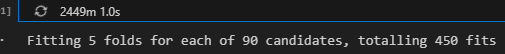

In [ ]:
param_grid = {
    'C': [10, 100, 1000],
    'gamma': ['scale', 'auto'],  
    'kernel': ['rbf'],
    'class_weight': ['balanced'],
    'decision_function_shape': ['ovo', 'ovr', None]
}

# Configurar el GridSearch con validación cruzada
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Precisión del mejor modelo: ", accuracy)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local

Mejores parámetros: {'C': 1000, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
Precisión del mejor modelo:  0.61305


Como vemos, tras hacer un grid search hemos comprobado que el mejor modelo es el que ya habíamos entrenado anteriormente.

Como vemos, ya hemos calculado los resultados de test, los cuales dan una precisión del 60%.

Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

In [ ]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4978 1014    5    0  313   12  895]
 [2225 4964  347    0 1758  393  111]
 [   0    5  812   98   32  287    0]
 [   0    0    4   99    0    5    0]
 [   2   10   10    0  289   11    0]
 [   0    7  110   24    9  445    0]
 [  50    2    0    0    0    0  674]]


In [ ]:
clase = 0
for j in cm:
    sum = 0
    for k in j:
        sum += k
    print(f"Nº of correct predictions in class {clase+1}: {j[clase]}. %: {j[clase]/sum * 100:.2f}%")   
    clase += 1

Nº of correct predictions in class 1: 4978. %: 68.98%
Nº of correct predictions in class 2: 4964. %: 50.66%
Nº of correct predictions in class 3: 812. %: 65.80%
Nº of correct predictions in class 4: 99. %: 91.67%
Nº of correct predictions in class 5: 289. %: 89.75%
Nº of correct predictions in class 6: 445. %: 74.79%
Nº of correct predictions in class 7: 674. %: 92.84%


In [ ]:
clase = 0
total = 0
for i in cm:
    sum = 0
    for j in i:
        sum += j 
    total += i[clase]
    
    clase += 1

print(f"Total de predicciones correctas: {total}.")

Total de predicciones correctas: 12261.


In [ ]:
print(f"Total de predicciones erroneas: {len(y_test) - total}.")

Total de predicciones erroneas: 7739.


También nos interesa ver el sobreajuste, para ello vamos a ver la diferencia del rendimiento del modelo comparando cuando predice datos vistos (train) y no vistos (test)

In [ ]:
y_pred_train = best_model.predict(X_train)
cmb = confusion_matrix(y_train, y_pred_train)
print(cm)

[[4978 1014    5    0  313   12  895]
 [2225 4964  347    0 1758  393  111]
 [   0    5  812   98   32  287    0]
 [   0    0    4   99    0    5    0]
 [   2   10   10    0  289   11    0]
 [   0    7  110   24    9  445    0]
 [  50    2    0    0    0    0  674]]


In [ ]:
clase = 0
for j in cmb:
    sum = 0
    for k in j:
        sum += k
    print(f"Nº of correct predictions in class {clase+1}: {j[clase]}. %: {j[clase]/sum * 100:.2f}%")   
    clase += 1

Nº of correct predictions in class 1: 20321. %: 69.49%
Nº of correct predictions in class 2: 19924. %: 51.14%
Nº of correct predictions in class 3: 3196. %: 64.96%
Nº of correct predictions in class 4: 341. %: 93.42%
Nº of correct predictions in class 5: 1206. %: 91.92%
Nº of correct predictions in class 6: 1837. %: 76.73%
Nº of correct predictions in class 7: 2648. %: 94.44%


Como podemos ver, los porcentajes de las predicciones correctas de cada clase no cambian mucho, por lo que podemos determinar que no hay sobreajuste a los datos de entrenamiento.

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.69      0.69      0.69      7217
           2       0.83      0.51      0.63      9798
           3       0.63      0.66      0.64      1234
           4       0.45      0.92      0.60       108
           5       0.12      0.90      0.21       322
           6       0.39      0.75      0.51       595
           7       0.40      0.93      0.56       726

    accuracy                           0.61     20000
   macro avg       0.50      0.76      0.55     20000
weighted avg       0.72      0.61      0.64     20000



Como podemos ver, el modelo tiene capacidad predictiva diferente para cada una de las clases, vamos a analizar el reporte de clasificación:

Clases con mejor rendimiento:

- Clase 2: Alta precisión (0.83) pero bajo recall (0.51), lo que indica que el modelo es bueno prediciendo correctamente cuando es clase 2, pero no detecta todos los casos.
- Clase 1: Tiene valores equilibrados de precisión (0.69) y recall (0.69), lo que sugiere un buen rendimiento.

Clases con peor rendimiento:

- Clase 5: Extremadamente baja precisión (0.12) pero alto recall (0.90), lo que significa que el modelo etiqueta demasiados casos como clase 5 aunque no lo sean.
- Clase 4 y Clase 7: Ambas tienen un recall muy alto (0.92 y 0.93, respectivamente) pero precisión relativamente baja (0.45 y 0.40), lo que sugiere que el modelo clasifica muchas instancias en estas clases, aunque muchas sean errores.

Rendimiento general:

- La precisión macro promedio es 0.50, lo que indica que, en promedio, la capacidad del modelo para evitar falsos positivos es moderada.
- El recall macro promedio es 0.76, lo que sugiere que el modelo tiene una alta tendencia a clasificar instancias en sus clases verdaderas, pero a costa de una baja precisión.
- El f1-score macro de 0.55 refleja que el balance entre precisión y recall es desigual para muchas clases.


Para concluir, podemos determinar que el modelo funciona bien para algunas clases (1 y 2), pero tiene problemas con otras, especialmente aquellas con baja precisión como las clases 5 y 7. Parece que favorece el recall sobre la precisión, es decir, prefiere clasificar instancias en una clase aunque se equivoque, lo que puede ser problemático si se requiere precisión en ciertas aplicaciones

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

Comparando los dos modelos (SVM vs. Random Forest) que hemso determinado que son los mejores, podemos ver que Random Forest (RF) supera a SVM en la mayoría de las métricas clave. Para demostrarlo vamos a comparar los reports de clasificación.

1. Precisión 

RF tiene una mayor precisión promedio (0.65 vs. 0.50 en SVM), lo que significa que comete menos falsos positivos en general.

En particular, todas las clases tienen una mejor precisión en RF en comparación con SVM.
- Clase 1: 0.79 (RF) vs. 0.69 (SVM)
- Clase 2: 0.88 (RF) vs. 0.83 (SVM)
- Clase 3: 0.83 (RF) vs. 0.63 (SVM)
- Clase 4: 0.73 (RF) vs. 0.45 (SVM)
- Clase 5: 0.23 (RF) vs. 0.12 (SVM)
- Clase 6: 0.54 (RF) vs. 0.39 (SVM)
- Clase 7: 0.58 (RF) vs. 0.40 (SVM)

Como podemos ver esto se cumple en todas las clases, determinando que RF es mejor en precisión que SVM.

2. Recall

RF también tiene un mejor recall promedio (0.87 vs. 0.76 en SVM), indicando que identifica más instancias correctas en cada clase.

En todas las clases, RF tiene un recall superior o igual al de SVM, lo que indica que detecta más instancias correctamente sin dejar muchas sin clasificar.
- Clase 1: 0.78 (RF) vs. 0.69 (SVM)
- Clase 2: 0.70 (RF) vs. 0.51 (SVM)
- Clase 3: 0.84 (RF) vs. 0.66 (SVM)
- Clase 4: 0.95 (RF) vs. 0.92 (SVM)
- Clase 5: 0.96 (RF) vs. 0.90 (SVM)
- Clase 6: 0.92 (RF) vs. 0.75 (SVM)
- Clase 7: 0.96 (RF) vs. 0.93 (SVM)

Como podemos ver esto se cumple también para cada una de las clases, determinando que RF es mejor en recall que SVM.

3. F1-Score

RF tiene una mejor F1-score macro (0.71 vs. 0.55 en SVM), lo que indica que logra un mejor equilibrio entre precisión y recall.

En todas las clases, RF tiene un f1-score más alto, lo que significa que su desempeño es más estable y robusto en todas las categorías.

4. Accuracy

RF tiene una accuracy del 76%, mientras que SVM tiene solo 61%, lo que significa que en general, RF clasifica correctamente un mayor porcentaje de instancias.


Por todo esto, se puede determinar que el modelo de Random Forest clasifica mejor las instancias de este dataset.

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

Faruque, M. F., Asaduzzaman, & Sarker, I. H. (2019). Performance analysis of machine learning techniques to predict diabetes mellitus. International Journal of Advanced Computer Science and Applications, 10(1), 1-6.

**Objetivo**

El objetivo de esta investigación es analizar y comparar la eficacia de diferentes técnicas de machine learning en la predicción de la diabetes mellitus. Los autores buscan identificar el algoritmo que ofrece la mayor precisión en la clasificación de pacientes diabéticos y no diabéticos, basándose en diversos factores de riesgo.

**Técnicas de clasificación empleadas y adaptaciones:**

- SVM.
- Naive Bayes.
- KNN.
- Árboles de decisión.

**Principales resultados**

Los resultados experimentales indican que el Árbol de Decisión C4.5 superó a los otros algoritmos en términos de precisión, recall y medida F, logrando una precisión del 73.5% en la predicción de la diabetes mellitus. Este hallazgo sugiere que el Árbol de Decisión C4.5 es más efectivo para este tipo de clasificación en comparación con SVM, NB y KNN.